# Goals

1) Implement and fine-tune a decision tree classifier to predict an indivudal's religion status

2) Use the structure of the decision tree to better understand the relationship between the personal information and religion beliefs

3) Understand the pros and cons of decision trees

4) Implement a random forest classifier and compare the results with those of the decision tree classifier

5) Implement a decision tree regressor and briefly compare it with the decision tree classifier

# Data Overview

## Target Variable:
- belief: category, the religious belief status of the individual, used to classify Atheism(0) and Theism(1).

## Continuous/Numeric Variables:
- age: int64, the age of the user.
- height: float64, the height of the user in centimeters.
- income: int64, the income of the user.
- seriousness_degree: float64, the degree of seriousness about religion. (0 = unspecified ,1-4 = not serious to very serious)

## Categorical Variables:
- status: category, relationship status.
- sex: category, gender.
- orientation: category, sexual orientation.
- body_type: category, body type.
- diet: category, dietary habits.
- drinks: category, alcohol consumption habits.
- drugs: category, drug usage.
- education: category, educational attainment.
- ethnicity: category, ethnic background.
- job: category, employment description.
- location: category, user location.
- offspring: category, children status.
- pets: category, pet preferences.
- religion: category, religious background.
- sign: category, astrological symbol.
- smokes: category, smoking consumption.
- speaks: category, language spoken.
- education_clean: category, cleaned and simplified education information.
- education_final: category, finalized education information after processing.
- cleaned_religion: category, cleaned version of religious background.

## Text Variables:
- My self summary: object, a summary written by the user about themselves.
- What I’m doing with my life: object, user's description of their current life status.
- I’m really good at: object, what the user describes as their strengths.
- The first thing people usually notice about me: object, what the user thinks people notice about them first.
- Favorite books, movies, show, music, and food: object, user's favorites in books, movies, shows, music, and food.
- The six things I could never do without: object, things the user considers essential in their life.
- I spend a lot of time thinking about: object, topics the user often thinks about.
- On a typical Friday night I am: object, user's typical activities on a Friday night.
- The most private thing I am willing to admit: object, something personal the user is willing to share.
- You should message me if…: object, user's criteria for others to contact them.
- merged_profile: object, combined text from all essay sections.


In [87]:
# machine learning and visualization libraries
import os
import numpy as np
import pandas as pd

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import seaborn as sns
import graphviz
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
# Import data and conduct exploratory data analysis


data_path = "/Users/adhdtreamentii/Desktop/UChicago 2024/UChicago Winter 24/MACSS-30100/Final/data/" # change this to your path
df = pd.read_csv(os.path.join(data_path, 'cleaned_ohced_data_alldata.csv'))

df.head()

age     status sex orientation       body_type               diet  \
0   22     single   m    straight  a little extra  strictly anything   
1   35     single   m    straight         average       mostly other   
2   38  available   m    straight            thin           anything   
3   23     single   m    straight            thin         vegetarian   
4   29     single   m    straight        athletic                NaN   

     drinks      drugs                          education  \
0  socially      never      working on college/university   
1     often  sometimes              working on space camp   
2  socially        NaN     graduated from masters program   
3  socially        NaN      working on college/university   
4  socially      never  graduated from college/university   

             ethnicity  ...  \
0         asian, white  ...   
1                white  ...   
2                  NaN  ...   
3                white  ...   
4  asian, black, other  ...   

                      On a typical Friday night I am  \
0  trying to find someone to hang out with. i am ...   
1                                                NaN   
2  viewing. listening. dancing. talking. drinking...   
3                                                NaN   
4                                                NaN   

        The most private thing I am willing to admit  \
0  i am new to california and looking for someone...   
1  i am very open and will share just about anyth...   
2  when i was five years old, i was known as "the...   
3                                                NaN   
4                                                NaN   

                           You should message me if…  \
0  you want to be swept off your feet! you are ti...   
1                                                NaN   
2  you are bright, open, intense, silly, ironic, ...   
3                              you feel so inclined.   
4                                                NaN   

                                      merged_profile          education_clean  \
0  about me:  i would love to think that i was so...    on college/university   
1  i am a chef: this is what that means. 1. i am ...               space camp   
2  i'm not ashamed of much, but writing public te...          masters program   
3  i work in a library and go to school. . . read...    on college/university   
4  hey how's it going? currently vague on the pro...  from college/university   

      education_final cleaned_religion seriousness_degree       belief  \
0  college/university      agnosticism                4.0  agnosticism   
1          space camp      agnosticism                2.0  agnosticism   
2     masters program              NaN                NaN          NaN   
3  college/university              NaN                NaN          NaN   
4  college/university              NaN                NaN          NaN   

                        tokenized_normalized_profile  
0  ['would', 'love', 'think', 'kind', 'intellectu...  
1  ['chef', 'mean', 'workaholic', 'love', 'cook',...  
2  ['ashamed', 'much', 'writing', 'public', 'text...  
3  ['work', 'library', 'go', 'school', 'reading',...  
4  ['hey', 'going', 'currently', 'vague', 'profil...  

[5 rows x 38 columns]

In [89]:
df.shape

(59619, 38)

In [90]:
# There are 4 type of beliefs in the dataset
df.belief.value_counts()

theism         16101
agnosticism     8766
other           7689
atheism         6938
Name: belief, dtype: int64

In [91]:
# filtered the dataset to only include theism and atheism
df_filtered = df[df['belief'].isin(['theism', 'atheism'])].copy()

# belief as binary variable. 0: atheism, 1: theism
df_filtered['belief'] = df_filtered['belief'].map({'theism': 1, 'atheism': 0})

In [92]:
df_filtered.shape

(23039, 38)

In [93]:
# View variables
print(df_filtered.columns)

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'pets', 'religion', 'sign',
       'smokes', 'speaks', 'My self summary', 'What I’m doing with my life',
       'I’m really good at', 'The first thing people usually notice about me',
       'Favorite books, movies, show, music, and food',
       'The six things I could never do without',
       'I spend a lot of time thinking about',
       'On a typical Friday night I am',
       'The most private thing I am willing to admit',
       'You should message me if…', 'merged_profile', 'education_clean',
       'education_final', 'cleaned_religion', 'seriousness_degree', 'belief',
       'tokenized_normalized_profile'],
      dtype='object')


In [94]:
# Check
df_filtered.head()

age          status sex orientation body_type               diet  \
5    29          single   m    straight   average    mostly anything   
7    31          single   f    straight   average    mostly anything   
8    24          single   f    straight       NaN  strictly anything   
9    37          single   m    straight  athletic    mostly anything   
11   28  seeing someone   m    straight   average    mostly anything   

        drinks  drugs                          education ethnicity  ...  \
5     socially    NaN  graduated from college/university     white  ...   
7     socially  never  graduated from college/university     white  ...   
8     socially    NaN  graduated from college/university     white  ...   
9   not at all  never        working on two-year college     white  ...   
11    socially  never  graduated from college/university     white  ...   

                       On a typical Friday night I am  \
5                                out with my friends!   
7   out and about or relaxing at home with a good ...   
8   in or out... drinking with friends, maybe a ba...   
9                                      send a message   
11  hanging out with a small group of friends--sta...   

         The most private thing I am willing to admit  \
5   i cried on my first day at school because a bi...   
7                                                 NaN   
8   potential friends/lovers/people who come in co...   
9                                         and say hi.   
11  i'm picky when it comes to dating. i know what...   

                            You should message me if…  \
5                                     you're awesome.   
7                                                 NaN   
8   http://www.youtube.com/watch?v=4dxbwzuwsxk let...   
9                              you can rock the bells   
11  if you know who you are, who you want, where y...   

                                       merged_profile  \
5   i'm an australian living in san francisco, but...   
7    writing. meeting new people, spending time wi...   
8    oh goodness. at the moment i have 4 jobs, so ...   
9   my names jake. i'm a creative guy and i look f...   
11  i was born in wisconsin, grew up in iowa, and ...   

            education_clean     education_final cleaned_religion  \
5   from college/university  college/university          atheism   
7   from college/university  college/university     christianity   
8   from college/university  college/university     christianity   
9          two-year college    two-year college          atheism   
11  from college/university  college/university     christianity   

   seriousness_degree belief  \
5                 0.0      0   
7                 0.0      1   
8                 2.0      1   
9                 1.0      0   
11                4.0      1   

                         tokenized_normalized_profile  
5   ['australian', 'living', 'san', 'francisco', '...  
7   ['writing', 'meeting', 'new', 'people', 'spend...  
8   ['oh', 'goodness', 'moment', 'job', 'nice', 'f...  
9   ['name', 'jake', 'creative', 'guy', 'look', 'o...  
11  ['born', 'wisconsin', 'grew', 'iowa', 'moved',...  

[5 rows x 38 columns]

## Explore target variable

Target variable: belief

The aim here is to better understand our target and verify its integrity. We will look at some summary statistics, empirical distribution and missing values.

In [95]:
print(df_filtered.belief.describe()) # summary statistics
print()
print("Number of missing values: {}".format(df_filtered.belief.isna().sum())) 
print("Proportion of missing values: {:.4f}".format(df_filtered.belief.isna().sum()/len(df_filtered)))

count    23039.000000
mean         0.698858
std          0.458764
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: belief, dtype: float64

Number of missing values: 0
Proportion of missing values: 0.0000


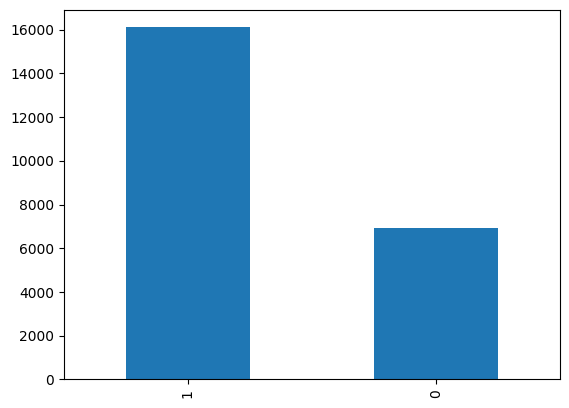

In [96]:
# Plot histogram of the target variable, 0 is atheism and 1 is theism
df_filtered.belief.value_counts().plot(kind='bar');

According to this plot, we observe that this dataset contains more theism than atheism. 

## Explore Features

We will now explore our features by:

1) Check for missing values

2) Exploratory data analysis

In [97]:
df_filtered.columns

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'pets', 'religion', 'sign',
       'smokes', 'speaks', 'My self summary', 'What I’m doing with my life',
       'I’m really good at', 'The first thing people usually notice about me',
       'Favorite books, movies, show, music, and food',
       'The six things I could never do without',
       'I spend a lot of time thinking about',
       'On a typical Friday night I am',
       'The most private thing I am willing to admit',
       'You should message me if…', 'merged_profile', 'education_clean',
       'education_final', 'cleaned_religion', 'seriousness_degree', 'belief',
       'tokenized_normalized_profile'],
      dtype='object')

In [98]:
# first, we will drop the columns that are not useful for our analysis (text data)
# And original version of education column ('education','education_clean')
columns_to_drop = [
    'My self summary', 
    'What I’m doing with my life', 
    'I’m really good at', 
    'The first thing people usually notice about me', 
    'Favorite books, movies, show, music, and food', 
    'The six things I could never do without', 
    'I spend a lot of time thinking about', 
    'On a typical Friday night I am', 
    'The most private thing I am willing to admit', 
    'You should message me if…', 
    'merged_profile',
    'education',
    'education_clean'
]

df_filtered = df_filtered.drop(columns=columns_to_drop)


In [99]:

missing_values_count = df_filtered.isna().sum()


columns_with_missing_values = missing_values_count[missing_values_count > 0].index
columns_without_missing_values = missing_values_count[missing_values_count == 0].index

num_columns_with_missing_values = len(columns_with_missing_values)
num_columns_without_missing_values = len(columns_without_missing_values)

print(f"columns WITH Missing values: {num_columns_with_missing_values}")
print(f"columns WITHOUT Missing values: {num_columns_without_missing_values}")


columns WITH Missing values: 12
columns WITHOUT Missing values: 13


In [100]:
# Check missing values
null_share = df_filtered.isna().sum()/len(df_filtered)
null_share[null_share>0]

body_type          0.075003
diet               0.371066
drinks             0.024827
drugs              0.190069
ethnicity          0.064239
job                0.087200
offspring          0.547289
pets               0.287165
sign               0.141977
smokes             0.053258
speaks             0.000651
education_final    0.068927
dtype: float64

In [101]:
# replace missing values with unknown
df_filtered['education_final']= df_filtered['education_final'].fillna('unknown')
df_filtered.education_final.value_counts()

college/university    12421
masters program        4357
unknown                1588
two-year college       1347
ph.d program           1052
high school             805
law school              610
space camp              573
med school              286
Name: education_final, dtype: int64

In [102]:
# replace missing values with unknown, and add a new column to indicate cleaned diet
df_filtered['diet'] = df_filtered.diet.fillna('unknown')
df_filtered['diet_clean'] = df_filtered['diet'].str.split().str[-1]
df_filtered['diet_clean'].value_counts()

anything      11457
unknown        8549
vegetarian     1915
other           701
vegan           295
kosher           74
halal            48
Name: diet_clean, dtype: int64

In [103]:
# ehthnicity is a categorical variable, we will replace missing values with unknown

ethnicity_map = {'asian': 'asian', 'white':'white', 'black':'black', 'hispanic / latin': 'latin', 'native american': 'native american', 'other':'other', 'pacific islander':'pacific islander', 'middle eastern': 'middle eastern', 'indian': 'indian', 'unknown':'unknown'}
df_filtered['ethnicity'] = df_filtered.ethnicity.fillna('unknown')
df_filtered['ethnicity_clean'] = df_filtered.ethnicity.map(ethnicity_map).fillna('multiethnic')
df_filtered.ethnicity_clean.value_counts()

white               12889
multiethnic          2706
asian                2316
unknown              1480
latin                1309
black                 914
other                 546
indian                502
pacific islander      227
middle eastern        128
native american        22
Name: ethnicity_clean, dtype: int64

In [104]:
df_filtered['job_clean'] = df_filtered.job.str.split(' /').str[0]
df_filtered.job_clean.value_counts()

other             2891
student           2177
computer          2063
science           2022
sales             1836
medicine          1527
artistic          1472
education         1445
executive          981
banking            956
entertainment      837
law                589
hospitality        464
construction       395
clerical           372
political          317
rather not say     171
transportation     161
unemployed         123
military           118
retired            113
Name: job_clean, dtype: int64

In [105]:
df_filtered.columns

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'ethnicity', 'height', 'income', 'job', 'last_online',
       'location', 'offspring', 'pets', 'religion', 'sign', 'smokes', 'speaks',
       'education_final', 'cleaned_religion', 'seriousness_degree', 'belief',
       'tokenized_normalized_profile', 'diet_clean', 'ethnicity_clean',
       'job_clean'],
      dtype='object')

In [106]:
# Check missing values
null_share = df_filtered.isna().sum()/len(df_filtered)
null_share[null_share>0]

body_type    0.075003
drinks       0.024827
drugs        0.190069
job          0.087200
offspring    0.547289
pets         0.287165
sign         0.141977
smokes       0.053258
speaks       0.000651
job_clean    0.087200
dtype: float64

### Feature Selection

In this task, the goal is to predict one's religious belief based on the following features:

#8 Catgorical:
diet(clean), 
drinks,
etnicity(clean), 
education(final), 
status, 
drugs, 
smokes, 
orientation,
job(clean)

#2 Num:
age, 
height

$ Tagert:
belief

Using the prior knowledge of the features (described in the data overview), let's first encode the **categorical features**

In [107]:
df_filtered.columns

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'ethnicity', 'height', 'income', 'job', 'last_online',
       'location', 'offspring', 'pets', 'religion', 'sign', 'smokes', 'speaks',
       'education_final', 'cleaned_religion', 'seriousness_degree', 'belief',
       'tokenized_normalized_profile', 'diet_clean', 'ethnicity_clean',
       'job_clean'],
      dtype='object')

In [108]:
# Check missing values
null_share = df_filtered.isna().sum()/len(df_filtered)
null_share[null_share>0]

#drinks, drugs, smokes,job_clean

body_type    0.075003
drinks       0.024827
drugs        0.190069
job          0.087200
offspring    0.547289
pets         0.287165
sign         0.141977
smokes       0.053258
speaks       0.000651
job_clean    0.087200
dtype: float64

In [109]:
feat =['education_final', 'status', 'ethnicity_clean', 'diet_clean', 'drinks', 'job_clean', 'drugs', 'smokes','age','orientation', 'height', 'belief' ]
df = df_filtered[feat].dropna(subset = ['job_clean', 'drugs', 'smokes', 'drinks', 'belief'])
print(df.shape)

# Now we have a new df to work with
df.isna().sum()

(16597, 12)


education_final    0
status             0
ethnicity_clean    0
diet_clean         0
drinks             0
job_clean          0
drugs              0
smokes             0
age                0
orientation        0
height             0
belief             0
dtype: int64

- Encode categorical features
     - We will apply one-hot encoder to encode categorical features here <br>


In [110]:
print(df.dtypes)


education_final     object
status              object
ethnicity_clean     object
diet_clean          object
drinks              object
job_clean           object
drugs               object
smokes              object
age                  int64
orientation         object
height             float64
belief               int64
dtype: object


In [111]:
cats = ['diet_clean', 'drinks', 'ethnicity_clean', 'education_final', 'status', 'drugs', 'smokes', 'orientation','job_clean']

In [112]:
for i in cats:
    print(df[i].value_counts())

anything      8548
unknown       5871
vegetarian    1347
other          532
vegan          204
kosher          57
halal           38
Name: diet_clean, dtype: int64
socially       11740
rarely          2095
often           1364
not at all      1169
very often       155
desperately       74
Name: drinks, dtype: int64
white               9232
multiethnic         1946
asian               1841
latin                995
unknown              802
black                736
other                384
indian               382
pacific islander     169
middle eastern        90
native american       20
Name: ethnicity_clean, dtype: int64
college/university    8972
masters program       3235
two-year college      1104
unknown                811
ph.d program           792
high school            656
law school             405
space camp             396
med school             226
Name: education_final, dtype: int64
single            15396
seeing someone      608
available           491
married             1

In [113]:
from sklearn.preprocessing import OneHotEncoder

# Initiate one-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(df[cats]) 

# encode the features with the learned categories during the fit process
ohe_features = pd.DataFrame(ohe.transform(df[cats]).toarray(), index=df.index)

col_names = [f"{cat}_{category}" for cat, categories in zip(cats, ohe.categories_) for category in categories]
ohe_features.columns = col_names

In [114]:
ohe_features

diet_clean_anything  diet_clean_halal  diet_clean_kosher  \
7                      1.0               0.0                0.0   
9                      1.0               0.0                0.0   
11                     1.0               0.0                0.0   
13                     1.0               0.0                0.0   
14                     1.0               0.0                0.0   
...                    ...               ...                ...   
59602                  1.0               0.0                0.0   
59603                  0.0               0.0                0.0   
59609                  1.0               0.0                0.0   
59614                  0.0               0.0                0.0   
59616                  1.0               0.0                0.0   

       diet_clean_other  diet_clean_unknown  diet_clean_vegan  \
7                   0.0                 0.0               0.0   
9                   0.0                 0.0               0.0   
11                  0.0                 0.0               0.0   
13                  0.0                 0.0               0.0   
14                  0.0                 0.0               0.0   
...                 ...                 ...               ...   
59602               0.0                 0.0               0.0   
59603               0.0                 0.0               0.0   
59609               0.0                 0.0               0.0   
59614               0.0                 1.0               0.0   
59616               0.0                 0.0               0.0   

       diet_clean_vegetarian  drinks_desperately  drinks_not at all  \
7                        0.0                 0.0                0.0   
9                        0.0                 0.0                1.0   
11                       0.0                 0.0                0.0   
13                       0.0                 0.0                0.0   
14                       0.0                 0.0                0.0   
...                      ...                 ...                ...   
59602                    0.0                 0.0                0.0   
59603                    1.0                 0.0                0.0   
59609                    0.0                 0.0                0.0   
59614                    0.0                 0.0                0.0   
59616                    0.0                 0.0                1.0   

       drinks_often  ...  job_clean_military  job_clean_other  \
7               0.0  ...                 0.0              0.0   
9               0.0  ...                 0.0              0.0   
11              0.0  ...                 0.0              0.0   
13              0.0  ...                 0.0              0.0   
14              0.0  ...                 0.0              1.0   
...             ...  ...                 ...              ...   
59602           0.0  ...                 0.0              0.0   
59603           0.0  ...                 0.0              0.0   
59609           0.0  ...                 0.0              1.0   
59614           0.0  ...                 0.0              0.0   
59616           0.0  ...                 0.0              0.0   

       job_clean_political  job_clean_rather not say  job_clean_retired  \
7                      0.0                       0.0                0.0   
9                      0.0                       0.0                0.0   
11                     0.0                       0.0                0.0   
13                     0.0                       0.0                0.0   
14                     0.0                       0.0                0.0   
...                    ...                       ...                ...   
59602                  0.0                       0.0                0.0   
59603                  0.0                       0.0                0.0   
59609                  0.0                       0.0                0.0   
59614                  0.0           

In [115]:
df.shape

(16597, 12)

In [116]:
print(df.index.is_unique)
print(df.index.is_monotonic_increasing)


True
True


In [117]:
# Drop categorical features and only keep numerical features
numeric_features = df.drop(cats, axis=1)

In [118]:
ohe_features.shape

(16597, 70)

## Finalize feature and target variables and create train-test split

In [119]:
# Create feature matrix X by concatenating numeric and OHE feature matrix

df_X = pd.concat([numeric_features, ohe_features], axis = 1)

feature_names = df_X.columns.to_list()
df_X.shape

(16597, 73)

In [124]:
df_X

age  height  belief  diet_clean_anything  diet_clean_halal  \
7       31    65.0       1                  1.0               0.0   
9       37    65.0       0                  1.0               0.0   
11      28    72.0       1                  1.0               0.0   
13      30    66.0       1                  1.0               0.0   
14      29    62.0       1                  1.0               0.0   
...    ...     ...     ...                  ...               ...   
59602   29    75.0       1                  1.0               0.0   
59603   27    68.0       0                  0.0               0.0   
59609   25    61.0       0                  1.0               0.0   
59614   59    62.0       1                  0.0               0.0   
59616   42    71.0       1                  1.0               0.0   

       diet_clean_kosher  diet_clean_other  diet_clean_unknown  \
7                    0.0               0.0                 0.0   
9                    0.0               0.0                 0.0   
11                   0.0               0.0                 0.0   
13                   0.0               0.0                 0.0   
14                   0.0               0.0                 0.0   
...                  ...               ...                 ...   
59602                0.0               0.0                 0.0   
59603                0.0               0.0                 0.0   
59609                0.0               0.0                 0.0   
59614                0.0               0.0                 1.0   
59616                0.0               0.0                 0.0   

       diet_clean_vegan  diet_clean_vegetarian  ...  job_clean_military  \
7                   0.0                    0.0  ...                 0.0   
9                   0.0                    0.0  ...                 0.0   
11                  0.0                    0.0  ...                 0.0   
13                  0.0                    0.0  ...                 0.0   
14                  0.0                    0.0  ...                 0.0   
...                 ...                    ...  ...                 ...   
59602               0.0                    0.0  ...                 0.0   
59603               0.0                    1.0  ...                 0.0   
59609               0.0                    0.0  ...                 0.0   
59614               0.0                    0.0  ...                 0.0   
59616               0.0                    0.0  ...                 0.0   

       job_clean_other  job_clean_political  job_clean_rather not say  \
7                  0.0                  0.0                       0.0   
9                  0.0                  0.0                       0.0   
11                 0.0                  0.0                       0.0   
13                 0.0                  0.0                       0.0   
14                 1.0                  0.0                       0.0   
...                ...                  ...                       ...   
59602              0.0                  0.0                       0.0   
59603              0.0                  0.0                       0.0   
59609              1.0                  0.0                       0.0   
59614              0.0                  0.0                       0.0   
59616              0.0                  0.0                       0.0   

       job_clean_retired  job_clean_sales  job_clean_science  \
7                    0.0              0.0                0.0   
9                    0.0              0.0                0.0   
11                   0.0              0.0                0.0   
13                   0.0              1.0                0.0   
14                   0.0              0.0                0.0   
...                  ...              ...                ...   
59602                0.0              0.0                1.0   
59603                0.0              0.0                0.0   
59609                0.0       

In [123]:
#df_X.to_csv('/Users/adhdtreamentii/Desktop/UChicago 2024/UChicago Winter 24/MACSS-30100/Final/data/encoded_cleanedcat_dataX.csv')


In [121]:
# Check if the 'belief' column is in df_X
if 'belief' in df_X.columns:
    df_X = df_X.drop('belief', axis=1)

# Update feature names
feature_names = df_X.columns.to_list()

print(df_X.shape)


SyntaxError: invalid syntax (1574959641.py, line 2)

In [ ]:
# Create target variable
target = 'belief'
df_y = df[[target]]
df_y.shape

(16597, 1)

In [ ]:
# Create split with Sklearn
df_X_train, df_X_test, df_y_train, df_y_test  = train_test_split(df_X, df_y, test_size = 0.3,random_state = 42)

# View the training and testing feature matrix 
df_X_train.shape, df_X_test.shape

((11617, 72), (4980, 72))

# Train and Test DT and RF

In this subsection we will train and test the following models:

i) Decision tree classifier

ii) Random forest classifier

iii) Decision tree regressor



In [ ]:
# Create a DecisionTreeClassifier 
# Please set criterion = "entropy" and random_state = 42, and keep all the other parameters with the default value.
dt_clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
# Use the "fit" function to train the DecisionTreeClassifier on training set
dt_clf.fit(df_X_train, df_y_train)

# Use the "score" function to evaluate the model performance on testing set and report accuracy
# Round it to the 3rd decimal (e.g., 0.800, 0.850, 0.862).
float("{:.3f}".format(dt_clf.score(df_X_test, df_y_test)))

# 66.3% accuracy

0.663

In [ ]:
dtc_data = tree.export_graphviz(dt_clf, out_file=None,
                                feature_names=df_X_train.columns,
                                class_names=None,
                                filled=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(dtc_data)
graph

In [ ]:
# Calculate the training accuracy
train_accuracy = dt_clf.score(df_X_train, df_y_train)
print("Training Accuracy: {:.3f}".format(train_accuracy))

# Calculate the testing accuracy
test_accuracy = dt_clf.score(df_X_test, df_y_test)
print("Testing Accuracy: {:.3f}".format(test_accuracy))


Training Accuracy: 0.994
Testing Accuracy: 0.663


In [ ]:
# Apperantly, the decision tree model is overfitting the training data.
# Meaning that the model is overly complex and is capturing the noise in the training data.

In [ ]:
# here is an example of setting max_depth=3
dt_clf2 = tree.DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=3)

# fit the model
dt_clf2.fit(df_X_train, df_y_train)

# evaluate the model
float("{:.3f}".format(dt_clf2.score(df_X_test, df_y_test)))

0.74

**Discussion**

- Setting max_depth=3 helps increase accuracy by 8 percentage points. 
- Resticrt the complexity really boost the performance

In [ ]:
# get number of leaves
dt_clf2.get_n_leaves()

8

In [ ]:
# here is an example of setting max_depth=8 and max_leaf_nodes=15
dt_clf3 = tree.DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=8, max_leaf_nodes=15)

# fit the model
dt_clf3.fit(df_X_train, df_y_train)

# evaluate the model
float("{:.3f}".format(dt_clf3.score(df_X_test, df_y_test)))

0.746

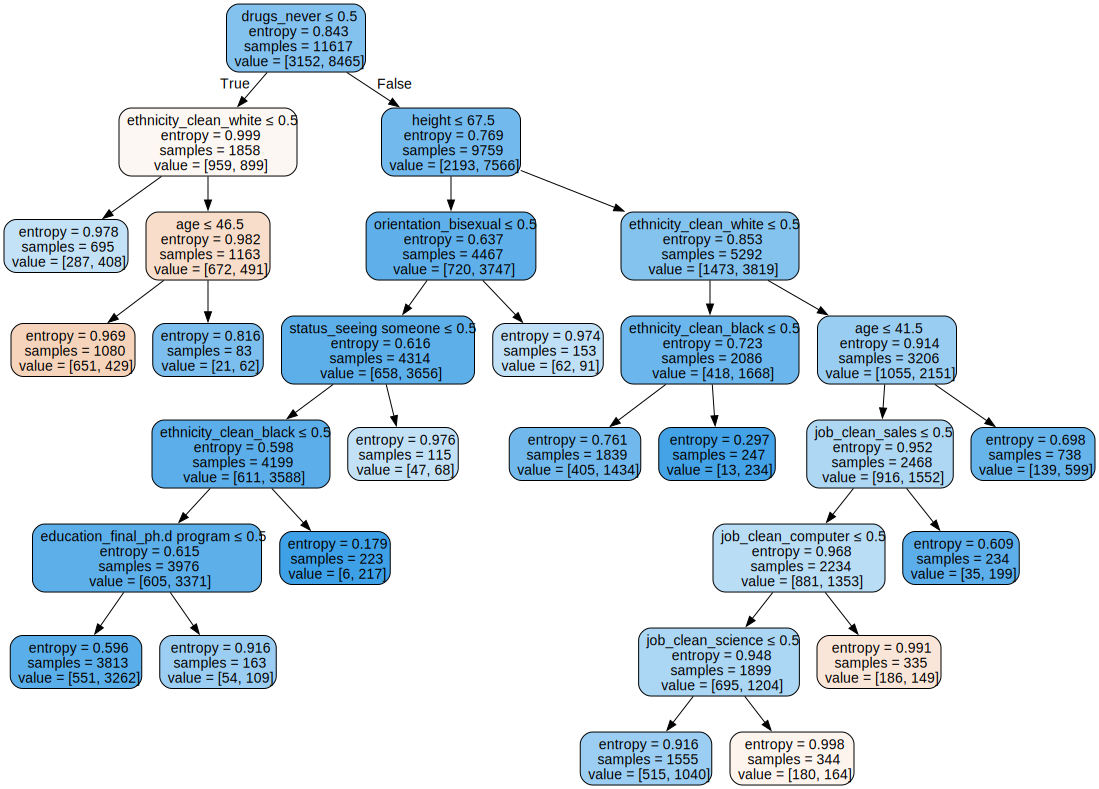

In [ ]:
dtc_data = tree.export_graphviz(dt_clf3, out_file=None,
                                feature_names=df_X_train.columns,
                                class_names=None,
                                filled=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(dtc_data)
graph

In [ ]:
# extract feature names of best performing model
features = dt_clf3.feature_names_in_
# extract feature importance
importance = np.round(dt_clf3.feature_importances_,2)

# Create pandas dataframe of feature and correpsonding importance
df_importance = pd.DataFrame([features, importance]).T
df_importance.rename(columns={0: 'feature', 1:'importance'}, inplace=True)

# Sort descendingly based on importance
df_importance.sort_values(['importance'], ascending=False, inplace=True)

# Show dataframe
df_importance.reset_index(drop=True)

feature importance
0                        drugs_never       0.42
1                             height       0.13
2              ethnicity_clean_white       0.11
3                                age       0.09
4              ethnicity_clean_black       0.06
..                               ...        ...
67        education_final_med school        0.0
68        education_final_space camp        0.0
69  education_final_two-year college        0.0
70           education_final_unknown        0.0
71              job_clean_unemployed        0.0

[72 rows x 2 columns]

In [ ]:
# It's not suprising that the usage of drugs is the most important feature in predicting belief.
# which is the most significant feature in colinearity with belief in our EDA analysis.

## Random forest classifier

In the previous task, we explored different data processing steps to clean data and improve the performance of a decision tree classifier.

In this task, you will use the same data to:
- train a [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).
- report its performance on the test set
- compare the performance of a decision tree classifier and a random forest classifier

In [ ]:
# Instantiate the model
rf_clf = RandomForestClassifier(n_estimators = 60, criterion = 'entropy', random_state = 42)

# train RFC
rf_clf.fit(df_X_train, df_y_train['belief'])

# evaluate the random forest classifier on test set 
float("{:.3f}".format(rf_clf.score(df_X_test, df_y_test['belief'])))

0.737

In [ ]:
# modify the model to reduce overfitting

rf_clf = RandomForestClassifier(
    n_estimators=50,        # number of trees in the forest
    criterion='entropy',    
    max_depth=20,         # the maximum depth of the tree
    min_samples_split=2,    # the minimum number of samples required to split an internal node
    min_samples_leaf=3,     # the minimum number of samples required to be at a leaf node
    bootstrap=True,         # whether bootstrap samples are used when building trees
    random_state=42        
)

rf_clf.fit(df_X_train, df_y_train)

test_accuracy = rf_clf.score(df_X_test, df_y_test)
print("Testing Accuracy: {:.3f}".format(test_accuracy))


/opt/anaconda3/envs/aidi/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Testing Accuracy: 0.757


In [ ]:
# extract feature names of initial model
features = rf_clf.feature_names_in_
# extract feature importance
importance = np.round(rf_clf.feature_importances_,2)

# Create pandas dataframe of features and correpsonding importance
df_importance = pd.DataFrame([features, importance]).T
df_importance.rename(columns={0: 'feature', 1:'importance'}, inplace=True)

# Sort descendingly based on importance
df_importance.sort_values(['importance'], ascending=False, inplace=True)

# Show dataframe
df_importance.reset_index(drop=True)

feature importance
0                          age       0.13
1                       height       0.12
2                  drugs_never       0.07
3              drugs_sometimes       0.05
4           job_clean_computer       0.04
..                         ...        ...
67  education_final_med school        0.0
68  education_final_space camp        0.0
69              status_unknown        0.0
70                 drugs_often        0.0
71        job_clean_unemployed        0.0

[72 rows x 2 columns]

In [ ]:
# age and height seems to have a positive correlation with belief, which is interesting.
# It's also interesting to see that the importance of 'job_clean' has increased in the random forest model.